# Propellant Storage

In [3]:
using PyPlot
using PorousMaterials
PyPlot.matplotlib.style.use("Solarize_Light2")
PorousMaterials.PATH_TO_DATA
set_tutorial_mode()
PorousMaterials.PATH_TO_DATA

┌ Warning: Directory for input data, "data", not found in present working directory, C:\Users\Owner\Box\GitHub\PropellantStorage
│ Change the PATH_TO_DATA variable to load input files from a different directory. See "set_path_to_data()".
└ @ PorousMaterials C:\Users\Owner\.julia\environments\v1.1\dev\PorousMaterials\src\PorousMaterials.jl:27
┌ Warning: PorousMaterials is now in Tutorial Mode. You have access to the testing data to experiment with PorousMaterials.
│ To get access to your own data use: reset_path_to_data()
└ @ PorousMaterials C:\Users\Owner\.julia\environments\v1.1\dev\PorousMaterials\src\PorousMaterials.jl:75


"C:\\Users\\Owner\\.julia\\environments\\v1.1\\dev\\PorousMaterials\\src\\..\\test\\data"

The temperature is 300 K in the atmosphere.

In [4]:
T = 300.0 # K

300.0

Universal gas constant

In [5]:
const R = 8.3144598e-5 # m³-bar/(K-mol)

8.3144598e-5

Mass desired of propellant

In [6]:
m_p = 1000 # mol

1000

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = VdWFluid(::Symbol) at EOS.jl:151
└ @ PorousMaterials C:\Users\Owner\.julia\environments\v1.1\dev\PorousMaterials\src\EOS.jl:151
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = VdWFluid(::Symbol) at EOS.jl:154
└ @ PorousMaterials C:\Users\Owner\.julia\environments\v1.1\dev\PorousMaterials\src\EOS.jl:154


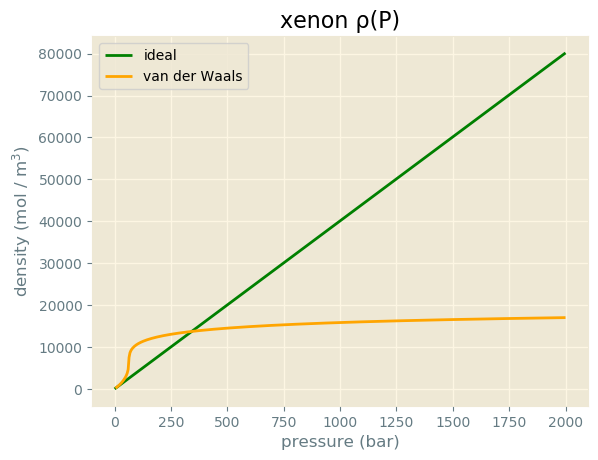

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = VdWFluid(::Symbol) at EOS.jl:155
└ @ PorousMaterials C:\Users\Owner\.julia\environments\v1.1\dev\PorousMaterials\src\EOS.jl:155


In [7]:
P = range(0.0, stop=2000.0, length=500) # bar

# ideal gas density
ρ_ig = P / (R * T) # mol / m³

ρ_vdw = zeros(length(P))
xe = VdWFluid(:Xe)

for (i, p_i) in enumerate(P)
    props = calculate_properties(xe, T, p_i, verbose=false)
    ρ_vdw[i] = props["density (mol/m³)"]
end
    
figure()
plot(P, ρ_ig, color="green", label="ideal")
plot(P, ρ_vdw, color="orange", label="van der Waals")
xlabel("pressure (bar)")
ylabel("density (mol / m\$^3\$)")
legend()
title("xenon ρ(P)")
savefig("Xenon Ideal Gas vs. van der Waals Gas Density.png", format="png",
       dpi=300)

In [8]:
collect(P)

500-element Array{Float64,1}:
    0.0              
    4.008016032064128
    8.016032064128256
   12.024048096192384
   16.03206412825651 
   20.04008016032064 
   24.04809619238477 
   28.0561122244489  
   32.06412825651302 
   36.07214428857716 
   40.08016032064128 
   44.08817635270541 
   48.09619238476954 
    ⋮                
 1955.9118236472946  
 1959.9198396793588  
 1963.9278557114228  
 1967.935871743487   
 1971.943887775551   
 1975.9519038076153  
 1979.9599198396793  
 1983.9679358717435  
 1987.9759519038075  
 1991.9839679358718  
 1995.9919839679358  
 2000.0              

For a thin-walled containing a supercritical, pressurized fluid without considering safety factor \beta

In [9]:
ρ_tank = 1470 # Kevlar 49 density (kg/m³) --http://www.mse.mtu.edu/~drjohn/my4150/props.html
σ = 28000 # yield strength of Kevlar 49 (bar) --http://www.mse.mtu.edu/~drjohn/my4150/props.html

28000

Solving for r
Volume of the tank equal to the volume of propellant

4/3 * pi * r ^ 3 = m_p / rho_vdw

Isolate for r

In [10]:
xe = VdWFluid(:Xe)
r = ((m_p * 3) ./ ((4 * π) .* ρ_vdw)) .^ (1/3) # inner radius of tank (m)

500-element Array{Float64,1}:
 NaN                  
   1.1336100494863337 
   0.8935405101320886 
   0.7748778986237346 
   0.6985548392080784 
   0.6430981059669488 
   0.5997790875753892 
   0.5642366814308543 
   0.5339834905872295 
   0.5074522959700897 
   0.48356296441492097
   0.4614914008356799 
   0.44051217175060026
   ⋮                  
   0.24135265505159992
   0.24133764084927706
   0.24132267064266885
   0.2413077442242802 
   0.2412928613879903 
   0.24127802192904108
   0.24126322564402497
   0.241248472330874  
   0.2412337617888479 
   0.241219093818523  
   0.24120446822178088
   0.24118988480179748

In [11]:
# V = 1 ./ ρ_vdw # m^3 / mol

Minimum wall thickness required to contain the pressure of supercritical fluid. Thickness is found using the free-body diagram of a spherical, thin-walled tank. By taking the force of the fluid over a cross-sectional area (P * pi * r ^ 2) set equal to the force of the tank walls over the circumference, including the yield strength and thickness of the wall (2 * pi * r * sigma * t). We then isolate t to solve for the thickness.

In [12]:
t_sphere = P .* r / (2 * σ) # spherical/endcaps thickness (m)

500-element Array{Float64,1}:
 NaN                     
   8.113441522232562e-5  
   0.00012790445321100608
   0.000166378020030862  
   0.0001999870710587112 
   0.00023013817133085774
   0.0002575633070034594 
   0.0002826837081316905 
   0.00030574491301874003
   0.0003268730792821935 
   0.0003460943060513319 
   0.00036332704045179495
   0.00037833853857766986
   ⋮                     
   0.0084297234229302    
   0.008446471970748388  
   0.008463219912318045  
   0.008479967249793987  
   0.008496713985320014  
   0.008513460121029005  
   0.008530205659042967  
   0.008546950601473135  
   0.008563694950420022  
   0.008580438707973514  
   0.008597181876212917  
   0.008613924457207054  

The mass of the tank can be found using the area of sphere, the thicckness of the sphere, and the density of the material.

In [16]:
m_tank = (4 * ρ_tank * π) .* r .^2 .* t_sphere # kg

500-element Array{Float64,1}:
 NaN                 
   1.9260150822343223
   1.8864328810973978
   1.8453965245780797
   1.8027276909342365
   1.758208266714495 
   1.7115667057141122
   1.6624577290958655
   1.6104309137640997
   1.5548797110999224
   1.4949536081149084
   1.4293946296758793
   1.3561995828092892
   ⋮                 
   9.07078108977803  
   9.087672551708001 
   9.104562267243299 
   9.121450242765528 
   9.138336484622833 
   9.15522099913017  
   9.172103792569478 
   9.188984871189978 
   9.205864241208348 
   9.222741908808977 
   9.239617880144163 
   9.256492161334378 

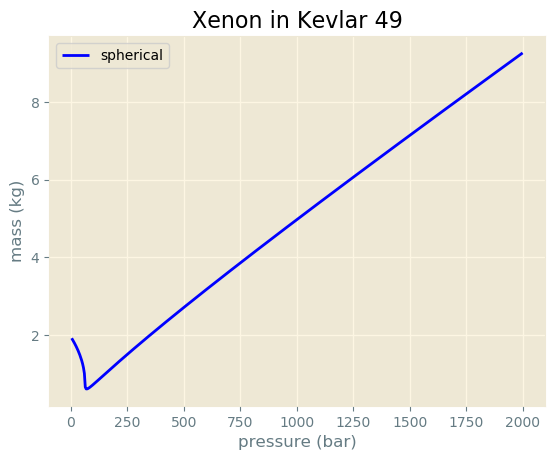

PyObject Text(0.5, 1, 'Xenon in Kevlar 49')

In [17]:
figure()
plot(P, m_tank, color="blue", label="spherical")
xlabel("pressure (bar)")
ylabel("mass (kg)")
legend()
title("Xenon in Kevlar 49")
#savefig("Xenon van der Waals Gas in Pure Kevlar 49.png", format="png",
 #      dpi=300)

Sphere is preferred for storage of high pressure fluids. Theoretically, a sphere would be the best shape of a pressure vessel. However, a spherical shape is tough to manufacture, therefore more expensive, so most pressure vessels are cylindrical with 2:1 semi-elliptical heads or end caps on each end. The drawback to cylindrical types is cylinders are not as strong as spheres due to the weak point at each end.

NOTE: this is using PURE Kevlar 49. Titanium is typically used only as an inner lining with carbon fiber overwrapping* -- https://www.researchgate.net/publication/269237920_Design_and_manufacture_of_the_ETS_VIII_xenon_tank
Kevlar 49 is used as 80-90% of the structural integrity of the tank while the lining makes direct contact with the compressed fluid. The lining does provide structural support, but very little compared to the overwrap.